In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [13]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="Eurasia") & (data.business_area_name=="B00 - LTC")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.tail()

,business_area_name,region_name,date,sales
55,B00 - LTC,Eurasia,2017-01-01,1761772.48
76,B00 - LTC,Eurasia,2017-02-01,1483419.66
115,B00 - LTC,Eurasia,2017-03-01,1452496.59
121,B00 - LTC,Eurasia,2017-04-01,2207482.76
149,B00 - LTC,Eurasia,2017-05-01,1952371.63


,date,sales
55,2021-08-01,2094294.30
56,2021-09-01,1915116.70
57,2021-10-01,2331714.10
58,2021-11-01,2575192.37
59,2021-12-01,3155248.79


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

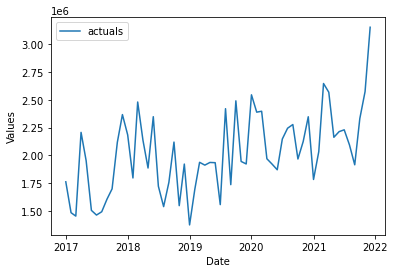

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

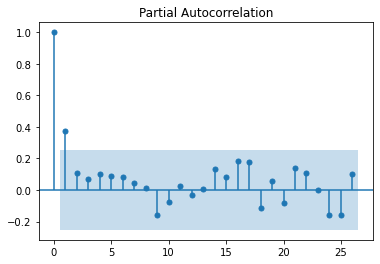

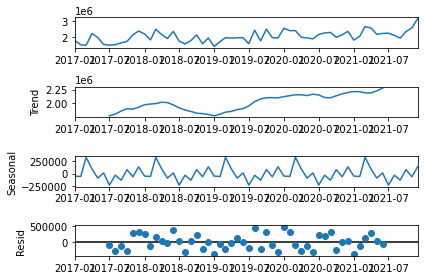

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 63s 63s/step - loss: 0.6505 - val_loss: 0.5716
Epoch 2/200
1/1 [==============================] - 0s 254ms/step - loss: 0.6414 - val_loss: 0.5563
Epoch 3/200
1/1 [==============================] - 0s 259ms/step - loss: 0.6261 - val_loss: 0.5275
Epoch 4/200
1/1 [==============================] - 0s 245ms/step - loss: 0.5974 - val_loss: 0.4722
Epoch 5/200
1/1 [==============================] - 0s 234ms/step - loss: 0.5404 - val_loss: 0.3709
Epoch 6/200
1/1 [==============================] - 0s 239ms/step - loss: 0.4236 - val_loss: 0.2896
Epoch 7/200
1/1 [==============================] - 0s 233ms/step - loss: 0.2662 - val_loss: 0.4055
Epoch 8/200
1/1 [==============================] - 0s 229ms/step - loss: 0.3781 - val_loss: 0.3629
Epoch 9/200
1/1 [==============================] - 0s 244ms/step - loss: 0.3293 - val_loss: 0.2897
Epoch 10/200
1/1 [==============================] - 0s 242ms/step - loss: 0.2268 - val_loss: 0.2452
Epoch 11/2

1/1 [==============================] - 0s 236ms/step - loss: 0.1903 - val_loss: 0.2651
Epoch 84/200
1/1 [==============================] - 0s 224ms/step - loss: 0.1901 - val_loss: 0.2656
Epoch 85/200
1/1 [==============================] - 0s 231ms/step - loss: 0.1904 - val_loss: 0.2655
Epoch 86/200
1/1 [==============================] - 0s 253ms/step - loss: 0.1903 - val_loss: 0.2652
Epoch 87/200
1/1 [==============================] - 0s 229ms/step - loss: 0.1902 - val_loss: 0.2662
Epoch 88/200
1/1 [==============================] - 0s 227ms/step - loss: 0.1903 - val_loss: 0.2668
Epoch 89/200
1/1 [==============================] - 0s 241ms/step - loss: 0.1903 - val_loss: 0.2643
Epoch 90/200
1/1 [==============================] - 0s 234ms/step - loss: 0.1904 - val_loss: 0.2635
Epoch 91/200
1/1 [==============================] - 0s 234ms/step - loss: 0.1905 - val_loss: 0.2640
Epoch 92/200
1/1 [==============================] - 0s 226ms/step - loss: 0.1901 - val_loss: 0.2637
Epoch 93/200


1/1 [==============================] - 0s 275ms/step - loss: 0.1901 - val_loss: 0.2642
Epoch 165/200
1/1 [==============================] - 0s 279ms/step - loss: 0.1903 - val_loss: 0.2606
Epoch 166/200
1/1 [==============================] - 0s 280ms/step - loss: 0.1904 - val_loss: 0.2624
Epoch 167/200
1/1 [==============================] - 0s 277ms/step - loss: 0.1903 - val_loss: 0.2655
Epoch 168/200
1/1 [==============================] - 0s 280ms/step - loss: 0.1903 - val_loss: 0.2656
Epoch 169/200
1/1 [==============================] - 0s 292ms/step - loss: 0.1903 - val_loss: 0.2665
Epoch 170/200
1/1 [==============================] - 0s 287ms/step - loss: 0.1905 - val_loss: 0.2679
Epoch 171/200
1/1 [==============================] - 0s 277ms/step - loss: 0.1904 - val_loss: 0.2629
Epoch 172/200
1/1 [==============================] - 0s 280ms/step - loss: 0.1906 - val_loss: 0.2620
Epoch 173/200
1/1 [==============================] - 0s 275ms/step - loss: 0.1903 - val_loss: 0.2651
Epoc

Epoch 46/200
2/2 [==============================] - 0s 192ms/step - loss: 0.1215 - val_loss: 0.1680
Epoch 47/200
2/2 [==============================] - 0s 154ms/step - loss: 0.1209 - val_loss: 0.1677
Epoch 48/200
2/2 [==============================] - 0s 222ms/step - loss: 0.1209 - val_loss: 0.1677
Epoch 49/200
2/2 [==============================] - 0s 172ms/step - loss: 0.1202 - val_loss: 0.1680
Epoch 50/200
2/2 [==============================] - 0s 167ms/step - loss: 0.1188 - val_loss: 0.1694
Epoch 51/200
2/2 [==============================] - 0s 131ms/step - loss: 0.1175 - val_loss: 0.1711
Epoch 52/200
2/2 [==============================] - 0s 144ms/step - loss: 0.1173 - val_loss: 0.1724
Epoch 53/200
2/2 [==============================] - 0s 256ms/step - loss: 0.1178 - val_loss: 0.1715
Epoch 54/200
2/2 [==============================] - 0s 213ms/step - loss: 0.1178 - val_loss: 0.1690
Epoch 55/200
2/2 [==============================] - 0s 160ms/step - loss: 0.1179 - val_loss: 0.1667


2/2 [==============================] - 0s 155ms/step - loss: 0.1209 - val_loss: 0.1537
Epoch 128/200
2/2 [==============================] - 0s 143ms/step - loss: 0.1186 - val_loss: 0.1616
Epoch 129/200
2/2 [==============================] - 0s 172ms/step - loss: 0.1215 - val_loss: 0.1618
Epoch 130/200
2/2 [==============================] - 0s 162ms/step - loss: 0.1208 - val_loss: 0.1550
Epoch 131/200
2/2 [==============================] - 0s 143ms/step - loss: 0.1185 - val_loss: 0.1495
Epoch 132/200
2/2 [==============================] - 0s 141ms/step - loss: 0.1212 - val_loss: 0.1502
Epoch 133/200
2/2 [==============================] - 0s 221ms/step - loss: 0.1210 - val_loss: 0.1570
Epoch 134/200
2/2 [==============================] - 0s 228ms/step - loss: 0.1178 - val_loss: 0.1610
Epoch 135/200
2/2 [==============================] - 0s 215ms/step - loss: 0.1175 - val_loss: 0.1601
Epoch 136/200
2/2 [==============================] - 0s 159ms/step - loss: 0.1181 - val_loss: 0.1588
Epoc

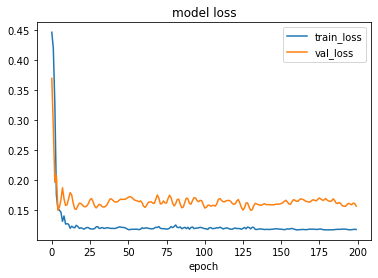

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

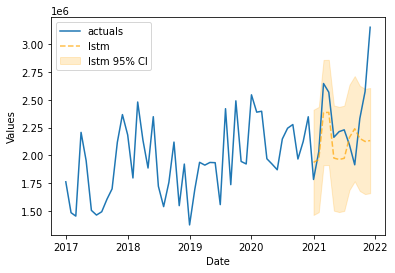

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

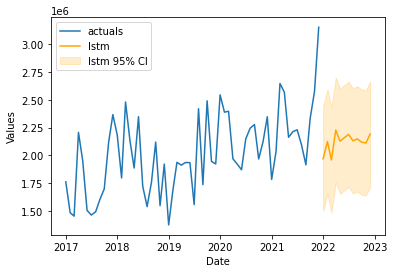

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.12,374558.57,-0.08,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,2411149.19,1936893.66,1782822.19,1462638.13,lstm,0.95
1,2021-02-01,2437018.23,1962762.70,2033825.03,1488507.17,lstm,0.95
2,2021-03-01,2860371.18,2386115.66,2648015.97,1911860.13,lstm,0.95
3,2021-04-01,2861736.24,2387480.72,2569377.47,1913225.19,lstm,0.95
4,2021-05-01,2450034.39,1975778.86,2163272.60,1501523.33,lstm,0.95
5,2021-06-01,2437408.97,1963153.45,2214284.38,1488897.92,lstm,0.95
6,2021-07-01,2447713.81,1973458.29,2230438.86,1499202.76,lstm,0.95
7,2021-08-01,2636595.91,2162340.39,2094294.30,1688084.86,lstm,0.95
8,2021-09-01,2714614.02,2240358.49,1915116.70,1766102.97,lstm,0.95
9,2021-10-01,2627136.82,2152881.29,2331714.10,1678625.76,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,2443600.53,1969345.01,1495089.48,lstm,0.95
1,2022-02-01,2598642.68,2124387.15,1650131.63,lstm,0.95
2,2022-03-01,2432723.64,1958468.11,1484212.59,lstm,0.95
3,2022-04-01,2703061.62,2228806.09,1754550.57,lstm,0.95
4,2022-05-01,2601563.82,2127308.29,1653052.77,lstm,0.95
5,2022-06-01,2633717.77,2159462.25,1685206.72,lstm,0.95
6,2022-07-01,2663697.86,2189442.34,1715186.81,lstm,0.95
7,2022-08-01,2605375.43,2131119.91,1656864.38,lstm,0.95
8,2022-09-01,2623061.56,2148806.03,1674550.51,lstm,0.95
9,2022-10-01,2593489.68,2119234.16,1644978.63,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:27713602.772000004
Total_2022:25459660.48873376
YOY (growth):-8.13298184941684
